In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib notebook

from scipy import stats


## Functions

In [195]:
def uploadDatabase(place,samples,people,shots,Classification=False):
    resultsTest=pd.read_csv(place+"_FeatureSet_1_startPerson_1_endPerson_1.csv")
    if len(resultsTest)!=samples:
        print('error'+' 1'+' 1')
        print(len(resultsTest))

    for i in range(2,people+1):
        auxFrame=pd.read_csv(place+"_FeatureSet_1_startPerson_"+str(i)+"_endPerson_"+str(i)+".csv")
        resultsTest=pd.concat([resultsTest,auxFrame],ignore_index=True)
        if len(auxFrame)!=samples:
            print('error'+' 1 '+str(i))
            print(len(auxFrame))
    for j in range(2,4):
        for i in range(1,people+1):
            auxFrame=pd.read_csv(place+"_FeatureSet_"+str(j)+"_startPerson_"+str(i)+"_endPerson_"+str(i)+".csv")
            resultsTest=pd.concat([resultsTest,auxFrame],ignore_index=True)

            if len(auxFrame)!=samples:
                print('error'+' '+str(j)+' '+str(i))
                print(len(auxFrame))

    
    return analysisResults(resultsTest.drop(columns='Unnamed: 0'),shots,Classification)


def analysisResults(resultDatabase,shots,Classification=False):
    results= pd.DataFrame(columns=['Feature Set', '# shots']) 
    timeM= pd.DataFrame(columns=[]) 

            
  
    idx=0
    for j in range(1,4):
        for i in range(1,shots+1):
            results.at[idx,'Feature Set']=j
            results.at[idx,'# shots']=i



            subset=str(tuple(range(1, i + 1)))



            LDAmulti=resultDatabase['AccLDAMulti'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
            QDAmulti=resultDatabase['AccQDAMulti'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]

            if Classification:

                LDAInd=resultDatabase['AccClLDAInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                QDAInd=resultDatabase['AccClQDAInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                PropL=resultDatabase['AccClLDAProp'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                PropQ=resultDatabase['AccClQDAProp'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                PropQ_L=resultDatabase['AccClLDAPropQ'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                PropL_Q=resultDatabase['AccClQDAPropL'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                SVMInd=resultDatabase['AccClSVMInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                KNNInd=resultDatabase['AccClKNNInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                LiuL=resultDatabase['AccClLDALiu'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                LiuQ=resultDatabase['AccClQDALiu'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]

            else:
                LDAInd=resultDatabase['AccLDAInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                QDAInd=resultDatabase['AccQDAInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                PropL=resultDatabase['AccLDAProp'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                PropQ=resultDatabase['AccQDAProp'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                PropQ_L=resultDatabase['AccLDAPropQ'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                PropL_Q=resultDatabase['AccQDAPropL'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                SVMInd=resultDatabase['AccSVMInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                KNNInd=resultDatabase['AccKNNInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                LiuL=resultDatabase['AccLDALiu'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                LiuQ=resultDatabase['AccQDALiu'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]


            wmL=resultDatabase['wTargetMeanLDAm'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
            wmQ=resultDatabase['wTargetMeanQDAm'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
            wcL=resultDatabase['wTargetCovLDAm'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
            wcQ=resultDatabase['wTargetCovQDAm'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]

            
#                     LDAmulti=resultDatabase['AccLDAMulti'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)]
#                     QDAmulti=resultDatabase['AccQDAMulti'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)]

#                     if Classification:

#                         LDAInd=resultDatabase['AccClLDAInd'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)]
#                         QDAInd=resultDatabase['AccClQDAInd'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)]
#                         PropL=resultDatabase['AccClLDAProp'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)]
#                         PropQ=resultDatabase['AccClQDAProp'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)]

#                     else:
#                         LDAInd=resultDatabase['AccLDAInd'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)]
#                         QDAInd=resultDatabase['AccQDAInd'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)]
#                         PropL=resultDatabase['AccLDAProp'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)]
#                         PropQ=resultDatabase['AccQDAProp'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)]

#                     SVMInd=resultDatabase['AccSVMInd'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)]
#                     KNNInd=resultDatabase['AccKNNInd'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)]

# #                     SVMPropQ=resultDatabase['AccSVMPropQ'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)]

#                     LiuL=resultDatabase['AccLDALiu'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)]
#                     LiuQ=resultDatabase['AccQDALiu'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)]


# #                     PropKL=resultDatabase['AccKNNPropL'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)]
# #                     PropKQ=resultDatabase['AccKNNPropQ'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)]
# #                     PropSL=resultDatabase['AccSVMPropL'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)]
# #                     PropSQ=resultDatabase['AccSVMPropQ'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)]

#                     wmL=resultDatabase['wTargetMeanLDAm'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)]
#                     wmQ=resultDatabase['wTargetMeanQDAm'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)]
#                     wcL=resultDatabase['wTargetCovLDAm'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)]
#                     wcQ=resultDatabase['wTargetCovQDAm'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)]





            results.at[idx,'LDA_Ind']=LDAInd.mean(axis=0)
            results.at[idx,'QDA_Ind']=QDAInd.mean(axis=0)
            results.at[idx,'SVM_Ind']=SVMInd.mean(axis=0)
    #                 results.at[idx,'SVM_PropQ']=SVMPropQ.mean(axis=0)
            results.at[idx,'KNN_Ind']=KNNInd.mean(axis=0)
            results.at[idx,'LDA_Multi']=LDAmulti.mean(axis=0)
            results.at[idx,'QDA_Multi']=QDAmulti.mean(axis=0)
    #                 results.at[idx,'SVM_Multi']=SVMmulti.mean(axis=0)
    #                 results.at[idx,'KNN_Multi']=KNNmulti.mean(axis=0)
            results.at[idx,'LiuL']=LiuL.mean(axis=0)
            results.at[idx,'LiuQ']=LiuQ.mean(axis=0)
            results.at[idx,'PropL']=PropL.mean(axis=0)
            results.at[idx,'PropQ']=PropQ.mean(axis=0)
            results.at[idx,'PropL_Q']=PropL_Q.mean(axis=0)
            results.at[idx,'PropQ_L']=PropQ_L.mean(axis=0)
    #                 results.at[idx,'PropKL']=PropKL.mean(axis=0)
    #                 results.at[idx,'PropKQ']=PropKQ.mean(axis=0)
    #                 results.at[idx,'PropSL']=PropSL.mean(axis=0)
    #                 results.at[idx,'PropSQ']=PropSQ.mean(axis=0)
            results.at[idx,'wmL']=wmL.mean(axis=0)
            results.at[idx,'wmQ']=wmQ.mean(axis=0)
            results.at[idx,'wcL']=wcL.mean(axis=0)
            results.at[idx,'wcQ']=wcQ.mean(axis=0)


            results.at[idx,'stdLDA_Ind']=LDAInd.std(axis=0)
            results.at[idx,'stdQDA_Ind']=QDAInd.std(axis=0)
            results.at[idx,'stdPropL']=PropL.std(axis=0)
            results.at[idx,'stdPropQ_L']=PropQ_L.std(axis=0)
            results.at[idx,'stdPropL_Q']=PropL_Q.std(axis=0)
            results.at[idx,'stdPropQ']=PropQ.std(axis=0)
            results.at[idx,'stdLiuL']=LiuL.std(axis=0)
            results.at[idx,'stdLiuQ']=LiuQ.std(axis=0)



            confidence=0.05

            p=stats.wilcoxon(PropQ_L.values,LDAInd.values,alternative='greater',zero_method='zsplit')[1]
            if p<confidence:
                results.at[idx,'T-test (LDA_Ind)']=p
            else:
                results.at[idx,'T-test (LDA_Ind)']=1

            p=stats.wilcoxon(PropQ.values,QDAInd.values,alternative='greater',zero_method='zsplit')[1]
            if p<confidence:
                results.at[idx,'T-test (QDA_Ind)']=p
            else:
                results.at[idx,'T-test (QDA_Ind)']=1

            p=stats.wilcoxon(PropQ_L.values,LDAmulti.values,alternative='greater',zero_method='zsplit')[1]
            if p<confidence:
                results.at[idx,'T-test (LDA_Multi)']=p
            else:
                results.at[idx,'T-test (LDA_Multi)']=1

            p=stats.wilcoxon(PropQ.values,QDAmulti.values,alternative='greater',zero_method='zsplit')[1]
            if p<confidence:
                results.at[idx,'T-test (QDA_Multi)']=p
            else:
                results.at[idx,'T-test (QDA_Multi)']=1



#                 confidence=0.05

#                 T_test,p=stats.ttest_ind(PropL.values,LDAInd.values)

#                 if p/2<confidence and T_test>0:
#                     results.at[idx,'T-test (LDA_Ind)']=T_test
#                 else:
#                     results.at[idx,'T-test (LDA_Ind)']=1

#                 T_test,p=stats.ttest_ind(PropQ.values,QDAInd.values)
#                 if p/2<confidence and T_test>0:
#                     results.at[idx,'T-test (QDA_Ind)']=T_test
#                 else:
#                     results.at[idx,'T-test (QDA_Ind)']=1

#                 T_test,p=stats.ttest_ind(PropL.values,LDAmulti.values)
#                 if p/2<confidence and T_test>0:
#                     results.at[idx,'T-test (LDA_Multi)']=T_test
#                 else:
#                     results.at[idx,'T-test (LDA_Multi)']=1

#                 T_test,p=stats.ttest_ind(PropQ.values,QDAmulti.values)
#                 if p/2<confidence and T_test>0:
#                     results.at[idx,'T-test (QDA_Multi)']=T_test
#                 else:
#                     results.at[idx,'T-test (QDA_Multi)']=1


#                 T_test=stats.ttest_ind(resultDatabase['AccLDALiu'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values
#                                   ,resultDatabase['AccLDAProp'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values)[1]
#                 if T_test<0.05:
#                     resultsLDA.at[idx,'T-test (Prop_Liu)']=0
#                 else:
#                     resultsLDA.at[idx,'T-test (Prop_Liu)']=1


#                 T_test=stats.ttest_ind(resultDatabase['AccLDAMulti'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values
#                                   ,resultDatabase['AccLDAProp'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values)[1]
#                 if T_test<0.05:
#                     resultsLDA.at[idx,'T-test (Prop_PK+Few)']=0
#                 else:
#                     resultsLDA.at[idx,'T-test (Prop_PK+Few)']=1

#                 T_test=stats.ttest_ind(resultDatabase['AccQDAInd'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values
#                                   ,resultDatabase['AccQDAProp'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values)[1]
#                 if T_test<0.05:
#                     resultsQDA.at[idx,'T-test (Prop_Few)']=0
#                 else:
#                     resultsQDA.at[idx,'T-test (Prop_Few)']=1

#                 T_test=stats.ttest_ind(resultDatabase['AccQDALiu'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values
#                                   ,resultDatabase['AccQDAProp'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values)[1]
#                 if T_test<0.05:
#                     resultsQDA.at[idx,'T-test (Prop_Liu)']=0
#                 else:
#                     resultsQDA.at[idx,'T-test (Prop_Liu)']=1    


#                 T_test=stats.ttest_ind(resultDatabase['AccQDAMulti'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values
#                                   ,resultDatabase['AccQDAProp'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values)[1]
#                 if T_test<0.05:
#                     resultsQDA.at[idx,'T-test (Prop_PK+Few)']=0
#                 else:
#                     resultsQDA.at[idx,'T-test (Prop_PK+Few)']=1

#                 resultsLDA.at[idx,'wMeanLDA']=resultDatabase['wTargetMeanLDA'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)
#                 resultsQDA.at[idx,'wMeanQDA']=resultDatabase['wTargetMeanQDA'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)            

#                 resultsLDA.at[idx,'t(Prop)']=resultDatabase['tPropL'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)
#                 resultsQDA.at[idx,'t(Prop)']=resultDatabase['tPropQ'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)

#                 resultsLDA.at[idx,'t(PK+Few)']=resultDatabase['tGenL'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)
#                 resultsQDA.at[idx,'t(PK+Few)']=resultDatabase['tGenQ'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)




#             print('Feature '+str(j))
#             print('Mean ',np.mean(resultDatabase['tPropL'].loc[(resultDatabase['Feature Set'] == j)]))
# #             print('Var Feature '+str(j),np.var(resultDatabase['tPropL'].loc[(resultDatabase['Feature Set'] == j)]))
#             print('Min ',np.min(resultDatabase['tPropL'].loc[(resultDatabase['Feature Set'] == j)]))
#             print('Max ',np.max(resultDatabase['tPropL'].loc[(resultDatabase['Feature Set'] == j)]))



#             timeM.at[3*j+0,'meanL']=resultDatabase['tPropL'].loc[(resultDatabase['Feature Set'] == j)].median(axis=0)
#             timeM.at[3*j+0,'meanQ']=resultDatabase['tPropQ'].loc[(resultDatabase['Feature Set'] == j)].mean(axis=0)
#             timeM.at[3*j+0,'varL']=resultDatabase['tPropL'].loc[(resultDatabase['Feature Set'] == j)].var(axis=0)
#             timeM.at[3*j+0,'varQ']=resultDatabase['tPropQ'].loc[(resultDatabase['Feature Set'] == j)].max(axis=0)
#             timeM.at[3*j+0,'minL']=np.min(resultDatabase['tPropL'].loc[(resultDatabase['Feature Set'] == j)])
#             timeM.at[3*j+0,'minQ']=np.min(resultDatabase['tPropQ'].loc[(resultDatabase['Feature Set'] == j)])
#             timeM.at[3*j+0,'maxL']=np.max(resultDatabase['tPropL'].loc[(resultDatabase['Feature Set'] == j)])
#             timeM.at[3*j+0,'maxQ']=np.max(resultDatabase['tPropQ'].loc[(resultDatabase['Feature Set'] == j)])
#             timeM.at[3*j+1,'meanL']=resultDatabase['tIndL'].loc[(resultDatabase['Feature Set'] == j)].mean(axis=0)
#             timeM.at[3*j+1,'meanQ']=resultDatabase['tIndQ'].loc[(resultDatabase['Feature Set'] == j)].mean(axis=0)
#             timeM.at[3*j+1,'varL']=resultDatabase['tIndL'].loc[(resultDatabase['Feature Set'] == j)].var(axis=0)
#             timeM.at[3*j+1,'varQ']=resultDatabase['tIndQ'].loc[(resultDatabase['Feature Set'] == j)].var(axis=0)
#             timeM.at[3*j+0,'minL']=np.min(resultDatabase['tIndL'].loc[(resultDatabase['Feature Set'] == j)])
#             timeM.at[3*j+0,'minQ']=np.min(resultDatabase['tIndQ'].loc[(resultDatabase['Feature Set'] == j)])
#             timeM.at[3*j+0,'maxL']=np.max(resultDatabase['tIndL'].loc[(resultDatabase['Feature Set'] == j)])
#             timeM.at[3*j+0,'maxQ']=np.max(resultDatabase['tIndQ'].loc[(resultDatabase['Feature Set'] == j)])
#             timeM.at[3*j+2,'meanL']=resultDatabase['tGenL'].loc[(resultDatabase['Feature Set'] == j)].mean(axis=0)
#             timeM.at[3*j+2,'meanQ']=resultDatabase['tGenQ'].loc[(resultDatabase['Feature Set'] == j)].mean(axis=0)
#             timeM.at[3*j+2,'varL']=resultDatabase['tGenL'].loc[(resultDatabase['Feature Set'] == j)].var(axis=0)
#             timeM.at[3*j+2,'varQ']=resultDatabase['tGenQ'].loc[(resultDatabase['Feature Set'] == j)].var(axis=0)
#             timeM.at[3*j+0,'minL']=np.min(resultDatabase['tGenL'].loc[(resultDatabase['Feature Set'] == j)])
#             timeM.at[3*j+0,'minQ']=np.min(resultDatabase['tGenQ'].loc[(resultDatabase['Feature Set'] == j)])
#             timeM.at[3*j+0,'maxL']=np.max(resultDatabase['tGenL'].loc[(resultDatabase['Feature Set'] == j)])
#             timeM.at[3*j+0,'maxQ']=np.max(resultDatabase['tGenQ'].loc[(resultDatabase['Feature Set'] == j)])
            idx+=1
        
    return results

def graphWeights():
    Partition='Time'
    FeatureSetM=3
    fig , ax = plt.subplots(nrows=1, ncols=3, sharey='row', figsize=(9, 3))
#     shot=np.arange(1,5)
    
    for Data in range(3):
        
        if Data==0:
            shot=np.arange(1,5)
            shots=5
            if Partition=='Time':
                results=resultsNina5T
            elif Partition=='Random':
                results=resultsNina5R   
#             ax[Data,FeatureSet].yaxis.set_ticks(np.arange(0.32, 0.63, .03))
            title='NinaPro5'
        elif Data==1:
            shot=np.arange(1,5)
            shots=5
            if Partition=='Time':
                results=resultsCoteT
            elif Partition=='Random':
                results=resultsCoteR 
#             ax[Data,FeatureSet].yaxis.set_ticks(np.arange(0.50, 0.99, 0.02))
            title='Cote-Allard'
        elif Data==2:
            shot=np.arange(1,5)
            shots=5
            if Partition=='Time':
                results=resultsEPNT
                shot=np.arange(1,26)
                shots=26
            elif Partition=='Random':
                results=resultsEPNR 
#             ax[Data,FeatureSet].yaxis.set_ticks(np.arange(0.55, 0.83, 0.03))
            title='EPN EC'
            
        wm=np.zeros(shots-1)
        wc=np.zeros(shots-1)
        
        
        for FeatureSet in range(FeatureSetM):  
            wm+=np.array(results['wmL'].loc[results['Feature Set']==FeatureSet+1])
            wm+=np.array(results['wmQ'].loc[results['Feature Set']==FeatureSet+1])
            wc+=np.array(results['wcL'].loc[results['Feature Set']==FeatureSet+1])
            wc+=np.array(results['wcQ'].loc[results['Feature Set']==FeatureSet+1])
                



        ax[Data].plot(shot,wm/6,label='Mean Weight',marker='.')
        ax[Data].plot(shot,wc/6,label='Covariance Weight',marker='^')
        ax[Data].plot(shot,np.ones(shots-1)*0.5,label='Liu Weight',marker='v')
        ax[Data].set_title(title)
        ax[Data].grid()
                
#     ax[2,0].set_xlabel('shots')
    ax[1].set_xlabel('repetitions')
    ax[0].set_ylabel('Target Person \n weight')
    ax[2].legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)
    fig.tight_layout(pad=0.1)
    plt.savefig("w.png", bbox_inches='tight', dpi=600)
    plt.show()



def graphACC(Partition):
    FeatureSetM=3
    fig , ax = plt.subplots(nrows=3, ncols=6, sharey='row', figsize=(10, 6))
#     shot=np.arange(1,5)
    for classifier in range(2):
        for FeatureSet in range(FeatureSetM):
            for Data in range(FeatureSetM):
                if Data==0:
                    shot=np.arange(1,5)
                    if Partition=='Time':
                        results=resultsNina5T
                    elif Partition=='Random':
                        results=resultsNina5R   
                    ax[Data,FeatureSet].yaxis.set_ticks(np.arange(0.30, 0.63, .04))
                elif Data==1:
                    shot=np.arange(1,5)
                    if Partition=='Time':
                        results=resultsCoteT
                    elif Partition=='Random':
                        results=resultsCoteR 
                    ax[Data,FeatureSet].yaxis.set_ticks(np.arange(0.6, 0.99, 0.04))
                elif Data==2:
                    shot=np.arange(1,5)
                    if Partition=='Time':
                        results=resultsEPNT
                        shot=np.arange(1,26)
                    elif Partition=='Random':
                        results=resultsEPNR 
                    ax[Data,FeatureSet].yaxis.set_ticks(np.arange(0.50, 0.91, 0.04))




                value=0.05

                if classifier == 0:

                    Model='T-test (LDA_Ind)'                
                    a=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    markers_on = list(np.where(a <= value)[0])


                    Model='PropQ_L'       
                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet].plot(shot,Y,label='Adaptive',marker='o',markevery=markers_on)


                    Model='LDA_Ind'

                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet].plot(shot,Y,label='Individual',linestyle='-.')
                    
                    Model='LDA_Multi'

                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet].plot(shot,Y,label='Multi-user',linestyle='--')


                    Model='LiuL'

                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet].plot(shot,Y,label='Liu',linestyle=':')   


                 
                    
                    ax[Data,FeatureSet].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
                    
                    if len(shot)==25:
                        ax[Data,FeatureSet].xaxis.set_ticks([1,5,10,15,20,25])
                    else:
                    
                        ax[Data,FeatureSet].xaxis.set_ticks(np.arange(1,len(shot)+.2 , 1))
                    ax[Data,FeatureSet].grid()




                elif classifier == 1:

                    Model='T-test (QDA_Ind)'                
                    a=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    markers_on = list(np.where(a <= value)[0])

                    Model='PropQ'

                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet+3].plot(shot,Y,label='p-value < 0.05',marker='o',markevery=markers_on)


                    Model='QDA_Ind'

                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet+3].plot(shot,Y,label='Individual',linestyle='-.')
                    
                    Model='QDA_Multi'

                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet+3].plot(shot,Y,label='Multi-user',linestyle='--')


                    Model='LiuQ'

                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet+3].plot(shot,Y,label='Liu',linestyle=':')     
                    
                    
                    ax[Data,FeatureSet+3].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
                   
                    if len(shot)==25:
                        ax[Data,FeatureSet+3].xaxis.set_ticks([1,5,10,15,20,25])
                    else:                  
                        ax[Data,FeatureSet+3].xaxis.set_ticks(np.arange(1,len(shot)+.2 , 1))
                    ax[Data,FeatureSet+3].grid()



                
#     ax[2,0].set_xlabel('shots')
    ax[2,1].set_xlabel('repetitions')
#     ax[2,2].set_xlabel('shots')
    ax[0,0].set_title('\n \n 1')
    ax[0,1].set_title('LDA\n Feature Sets \n 2')
    ax[0,2].set_title('\n \n 3')
#     ax[2,3].set_xlabel('shots')
    ax[2,4].set_xlabel('repetitions')
#     ax[2,5].set_xlabel('shots')
    ax[0,3].set_title('\n \n 1')
    ax[0,4].set_title('QDA\n Feature Sets \n 2')
    ax[0,5].set_title('\n \n 3')
    ax[0,0].set_ylabel('NinaPro5\n\naccuracy')
    ax[1,0].set_ylabel('Cote Allard\n\naccuracy')
    ax[2,0].set_ylabel('EPN EC\n\naccuracy')
#     ax[0,5].legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)
#     ax[0,2].legend(loc='best',prop={'size': 7}) 
#     ax[1,2].legend(loc='best',prop={'size': 7}) 
#     ax[2,2].legend(loc='best',prop={'size': 7})  
    fig.tight_layout(pad=0.1)
    plt.savefig("foo1.png", bbox_inches='tight', dpi=600)
    plt.show()

    
def graphIndividuals(classifier):
    FeatureSetM=3
    fig , ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey='row', figsize=(9, 6))
    shot=np.arange(1,5)
    for Data in range(FeatureSetM):
        if Data==0:
            resultsLDA=resultsNina5LDA
            resultsQDA=resultsNina5QDA
            resultsLDAnoPCA=resultsNina5LDAnoPCA
            resultsQDAnoPCA=resultsNina5QDAnoPCA
        elif Data==1:
            resultsLDA=resultsCoteLDA
            resultsQDA=resultsCoteQDA
            resultsLDAnoPCA=resultsCoteLDAnoPCA
            resultsQDAnoPCA=resultsCoteQDAnoPCA
        elif Data==2:
            resultsLDA=resultsEPNLDA
            resultsQDA=resultsEPNQDA
            resultsLDAnoPCA=resultsEPNLDAnoPCA
            resultsQDAnoPCA=resultsEPNQDAnoPCA
        for FeatureSet in range(FeatureSetM):
             
                       
                
            
            if classifier == 'LDA':
                
                

                Model='Acc(Few)'
                
                Y=np.array(resultsLDAnoPCA[Model].loc[resultsLDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='Individual',marker='x',color='red')
                
                Y=np.array(resultsLDA[Model].loc[resultsLDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='PCA_Individual',marker='o',color='blue')

                
                


                Model='Acc(PK+Few)'
                Y=np.array(resultsLDAnoPCA[Model].loc[resultsLDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='Multi-user',marker='x',color='red',linestyle=':')
                
                Y=np.array(resultsLDA[Model].loc[resultsLDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='PCA_Multi-user',marker='o',color='blue',linestyle=':')

                
                

            elif classifier == 'QDA':

                Model='Acc(Few)'
                Y=np.array(resultsQDAnoPCA[Model].loc[resultsQDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='Individual',marker='x',color='red')
                
                Y=np.array(resultsQDA[Model].loc[resultsQDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='PCA_Individual',marker='o',color='blue')            

                
                     


                Model='Acc(PK+Few)'
                Y=np.array(resultsQDAnoPCA[Model].loc[resultsQDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='Multi-user',marker='x',color='red',linestyle=':')
                
                Y=np.array(resultsQDA[Model].loc[resultsQDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='PCA_Multi-user',marker='o',color='blue',linestyle=':')            

                
                



                     
        
            ax[Data,FeatureSet].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
            ax[Data,FeatureSet].grid()
#             ax[Data,FeatureSet].yaxis.set_ticks(np.arange(0, 2, 1))
            ax[Data,FeatureSet].xaxis.set_ticks(np.arange(1,4.2 , 1))
    ax[2,0].set_xlabel('shots')
    ax[2,1].set_xlabel('shots')
    ax[2,2].set_xlabel('shots')
    ax[0,0].set_title('Feature Set 1')
    ax[0,1].set_title('Feature Set 2')
    ax[0,2].set_title('Feature Set 3')
    ax[0,0].set_ylabel('NinaPro5\n\naccuracy')
    ax[1,0].set_ylabel('Cote Allard\n\naccuracy')
    ax[2,0].set_ylabel('EPN EC\n\naccuracy')
    ax[0,2].legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)
#     ax[0,2].legend(loc='best',prop={'size': 7}) 
#     ax[1,2].legend(loc='best',prop={'size': 7}) 
#     ax[2,2].legend(loc='best',prop={'size': 7})  
    fig.tight_layout(pad=0.1)
    
    plt.show()

def labelPoint(xs,ys,ax1):
    for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        ax1.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,-5), # distance from text to points (x,y)
                     ha='center',
                    fontsize='small') # horizontal alignment can be left, right or center

def labelPointA(xs,ys,ax1,std):
    idx=0
    for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)
        stdi = "{:.2f}".format(std[idx])

        ax1.annotate(label+'±'+str(stdi), # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,-5), # distance from text to points (x,y)
                     ha='center',
                    fontsize='small') # horizontal alignment can be left, right or center
        idx+=1


def graphsDatabases():
    FeatureSetM=3
    shot=np.arange(1,5)
    
    for Data in range(FeatureSetM):
        if Data==0:
            resultsLDA=resultsNina5LDAnoPCA       
            resultsQDA=resultsNina5QDA
            fig1 , ax = plt.subplots(nrows=4, ncols=3,sharex=True, sharey='row',  figsize=(9, 7))
            ModelTxt='NinaPro5'
            start=0.45
            end=0.7
            step=0.05
        elif Data==1:
            resultsLDA=resultsCoteLDAnoPCA 
            resultsQDA=resultsCoteQDA
            fig2 , ax = plt.subplots(nrows=4, ncols=3, sharex=True, sharey='row', figsize=(9, 7))
            ModelTxt='Cote Allard'
            start=0.83
            end=1
            step=0.05
        elif Data==2:
            resultsLDA=resultsEPNLDAnoPCA
            resultsQDA=resultsEPNQDA
            fig3 , ax = plt.subplots(nrows=4, ncols=3, sharex=True, sharey='row', figsize=(9, 7))
            ModelTxt='EPN EC'
            start=0.84
            end=1
            step=0.05
        for F in range(FeatureSetM):
            FeatureSet=F+1

            yPropLDA=np.array(resultsLDA['Acc(Prop)'].loc[resultsLDA['Feature Set']==FeatureSet])
            yLiu=np.array(resultsLDA['Acc(Liu)'].loc[resultsLDA['Feature Set']==FeatureSet])
            yLDA=np.array(resultsLDA['Acc(Few)'].loc[resultsLDA['Feature Set']==FeatureSet])
#             yLDApk=np.array(resultsLDA['Acc(PK+Few)'].loc[resultsLDA['Feature Set']==FeatureSet])

            yPropQDA=np.array(resultsQDA['Acc(Prop)'].loc[resultsQDA['Feature Set']==FeatureSet])
            yLiuQ=np.array(resultsQDA['Acc(Liu_QDA)'].loc[resultsQDA['Feature Set']==FeatureSet])
            yQDA=np.array(resultsQDA['Acc(Few)'].loc[resultsQDA['Feature Set']==FeatureSet])
#             yQDApk=np.array(resultsQDA['Acc(PK+Few)'].loc[resultsQDA['Feature Set']==FeatureSet])



#             wPropLDA=np.array(resultsLDA['wMeanLDA'].loc[resultsLDA['Feature Set']==FeatureSet])
#             wPropQDA=np.array(resultsQDA['wMeanQDA'].loc[resultsQDA['Feature Set']==FeatureSet])
#             wLiu=np.ones(4)*0.5

            
            tT_PropBlLDA=np.array(resultsLDA['T-test (Prop_Few)'].loc[resultsLDA['Feature Set']==FeatureSet])
            tT_PropBlQDA=np.array(resultsQDA['T-test (Prop_Few)'].loc[resultsQDA['Feature Set']==FeatureSet])
            tT_PropLiuLDA=np.array(resultsLDA['T-test (Prop_Liu)'].loc[resultsLDA['Feature Set']==FeatureSet])
            tT_PropLiuQDA=np.array(resultsQDA['T-test (Prop_Liu)'].loc[resultsQDA['Feature Set']==FeatureSet])
#             tT_PropPkLDA=np.array(resultsLDA['T-test (Prop_PK+Few)'].loc[resultsLDA['Feature Set']==FeatureSet])
#             tT_PropPkQDA=np.array(resultsQDA['T-test (Prop_PK+Few)'].loc[resultsQDA['Feature Set']==FeatureSet])







            

            ax[0,F].plot(shot, yPropLDA, label='Adaptive',marker='^',color='green')
#             labelPoint(shot,yPropLDA,ax[0,F])
            
            ax[0,F].plot(shot, yLDA, label='BL: Individual',marker='x',color='red')
#             labelPoint(shot,yLDA,ax[0,F])
#             ax[0,F].plot(shot, yLiu, label='Liu',marker='v',color='orange')
#             labelPoint(shot,yLiu,ax[0,F])
#             ax[0,F].plot(shot, yLDApk, label='BL (PK+Few)',marker='^',color='red')
#             labelPoint(shot,yLDApk,ax[0,F])
#             ax[0,F].yaxis.set_ticks(np.arange(start, end, step))
            ax[0,F].grid()
            ax[0,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
        
#             ax2 = ax[0,F].twinx()
            ax[1,F].plot(shot, tT_PropBlLDA, label='H0 (Adaptive-BL)',marker='x',color='red')
#             ax[1,F].plot(shot, tT_PropLiuLDA, label='H0 (Adaptive-Liu)',marker='v',color='orange')
#             ax2.plot(shot, tT_PropPkLDA, label='H (Adapt_PK+Few)', linestyle='-.',color='red',marker='^')
            ax[1,F].set_ylim([-0.1, 1.1])
            ax[1,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%1d'))
            ax[1,F].grid()
            if F<=1:
                ax[1,F].set_yticklabels([])
            if F==2:
#                 ax[1,F].set_ylabel('Null Hypothesis')
                ax[1,F].yaxis.set_ticks(np.arange(0, 2, 1))
                ax[1,F].legend(bbox_to_anchor=(1.23, 0.6), loc='upper left', borderaxespad=0.)

            
            
            
            
#             ax[1,F].plot(shot, 1-wPropLDA , label='w (Proposed)',color='green')
# #             labelPoint(shot,1-wPropLDA,ax[1,F])
# #             ax[1,F].plot(shot, wLiu, label='w (Liu)', linestyle=':',marker='s')
#             ax[1,F].grid()
#             ax[1,F].set_ylim([0.05, 0.55])
#             ax[1,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
            
            
            
            
            
            

            ax[2,F].plot(shot, yPropQDA, label='Adaptive',marker='o',color='green')
#             labelPoint(shot,yPropQDA,ax[2,F])
            ax[2,F].plot(shot, yQDA, label='BL: PCA_Individual',marker='o',color='blue')
#             labelPoint(shot,yQDA,ax[2,F])
#             ax[2,F].plot(shot, yLiuQ, label='Liu',marker='v',color='orange')
#             labelPoint(shot,yLiuQ,ax[2,F])
            
#             ax[2,F].plot(shot, yQDApk, label='BL (PK+Few)',marker='^',color='red')
#             labelPoint(shot,yQDApk,ax[2,F])
            
#             ax[2,F].yaxis.set_ticks(np.arange(start, end, step))
            ax[2,F].grid()
            ax[2,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
        
            
#             ax3 = ax[1,F].twinx()
            ax[3,F].plot(shot, tT_PropBlQDA, label='H0 (Adaptive-BL)',marker='o',color='blue')
#             ax[3,F].plot(shot, tT_PropLiuQDA, label='H0 (Adaptive-Liu)',marker='v',color='orange')
            
#             ax3.plot(shot, tT_PropPkQDA, label='H (Adapt_PK+Few)', linestyle='-.',color='red',marker='^')
            ax[3,F].set_ylim([-0.1, 1.1])
            ax[3,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%1d'))
            ax[3,F].grid()
            if F<=1:
                ax[3,F].set_yticklabels([])
            if F==2:
#                 ax[3,F].set_ylabel('Null hypothesis')
                ax[3,F].yaxis.set_ticks(np.arange(0, 2, 1))
                ax[3,F].legend(bbox_to_anchor=(1.23, 0.6), loc='upper left', borderaxespad=0.)
            
            
            
                
            
#             ax[3,F].plot(shot, 1-wPropQDA , label='w (Proposed)',color='green')
# #             labelPoint(shot,1-wPropQDA,ax[3,F])
# #             ax[3,F].plot(shot, wLiu, label='w (Liu)', linestyle=':',marker='s')
#             ax[3,F].grid()
#             ax[3,F].set_ylim([0.05, 0.55])
#             ax[3,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
            
            
            
        
        
        
        ax[0,0].set_ylabel('LDA\n\naccuracy')
        ax[1,0].set_ylabel('LDA\n\nnull hypothesis')
        ax[2,0].set_ylabel('QDA\n\naccuracy')
        ax[3,0].set_ylabel('QDA\n\nnull hypothesis')
        ax[1,0].set_xlabel('shots')
        ax[1,1].set_xlabel('shots')
        ax[1,2].set_xlabel('shots')
        ax[0,0].set_title('Feature Set 1')
#         ax[0,1].set_title(ModelTxt+'\n\nFeature 2')
        ax[0,1].set_title('Feature Set 2')
        ax[0,2].set_title('Feature Set 3')
        ax[0,2].legend(bbox_to_anchor=(1.23, 1), loc='upper left', borderaxespad=0.)
        ax[1,2].legend(bbox_to_anchor=(1.23, 1), loc='upper left', borderaxespad=0.)
        ax[2,2].legend(bbox_to_anchor=(1.23, 1), loc='upper left', borderaxespad=0.)
        ax[3,2].legend(bbox_to_anchor=(1.23, 1), loc='upper left', borderaxespad=0.)
#         ax[2,2].legend(loc='lower right',prop={'size': 7})
#         ax[3,2].legend(loc='center right',prop={'size': 7})
        
    fig1.tight_layout(pad=0.4)
    fig2.tight_layout(pad=0.4)
    fig3.tight_layout(pad=0.4)
    plt.show()

    
    
def graphScientLiterat():
    
    fig , ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(9, 8))
    shot=np.arange(1,5)
    for Database in range(3):
        if Database==0:
            proposedLDA=np.array(resultsNina5LDAnoPCA['Acc(Prop)'].loc[resultsNina5LDAnoPCA['Feature Set']==3])
            proposedQDA=np.array(resultsNina5QDA['Acc(Prop)'].loc[resultsNina5QDA['Feature Set']==3])
            liu=np.array(resultsNina5LDAnoPCA['Acc(Liu)'].loc[resultsNina5LDAnoPCA['Feature Set']==2])
            STDproposedLDA=np.array(resultsNina5LDAnoPCA['Std(Prop)'].loc[resultsNina5LDAnoPCA['Feature Set']==3])
            STDproposedQDA=np.array(resultsNina5QDA['Std(Prop)'].loc[resultsNina5QDA['Feature Set']==3])
            STDliu=np.array(resultsNina5LDAnoPCA['Std(Liu)'].loc[resultsNina5LDAnoPCA['Feature Set']==2])
    #             liuLDA=np.array(resultsNina5LDAnoPCA['Acc(Liu)'].loc[resultsNina5LDAnoPCA['Feature Set']==3])
            cote=np.array([0.4941,0.6012,0.6516,0.6898])
            STDcote=np.array([0.0582,0.0479,0.0446,0.0409])
        elif Database==1:
            proposedLDA=np.array(resultsCoteLDAnoPCA['Acc(Prop)'].loc[resultsCoteLDAnoPCA['Feature Set']==3])
            proposedQDA=np.array(resultsCoteQDA['Acc(Prop)'].loc[resultsCoteQDA['Feature Set']==3])
            liu=np.array(resultsCoteLDAnoPCA['Acc(Liu)'].loc[resultsCoteLDAnoPCA['Feature Set']==2])
            STDproposedLDA=np.array(resultsCoteLDAnoPCA['Std(Prop)'].loc[resultsCoteLDAnoPCA['Feature Set']==3])
            STDproposedQDA=np.array(resultsCoteQDA['Std(Prop)'].loc[resultsCoteQDA['Feature Set']==3])
            STDliu=np.array(resultsCoteLDAnoPCA['Std(Liu)'].loc[resultsCoteLDAnoPCA['Feature Set']==2])
    #             liuLDA=np.array(resultsCoteLDAnoPCA['Acc(Liu)'].loc[resultsCoteLDAnoPCA['Feature Set']==3])
            cote=np.array([0.9469,0.9663,0.9782,0.9831])
            STDcote=np.array([0.0558,0.0454,0.0241,0.0216])
        elif Database==2:
            proposedLDA=np.array(resultsEPNLDAnoPCA['Acc(Prop)'].loc[resultsEPNLDAnoPCA['Feature Set']==3])
            proposedQDA=np.array(resultsEPNQDA['Acc(Prop)'].loc[resultsEPNQDA['Feature Set']==3])
            liu=np.array(resultsEPNLDAnoPCA['Acc(Liu)'].loc[resultsEPNLDAnoPCA['Feature Set']==2])
            liuLDA=np.array(resultsEPNLDAnoPCA['Acc(Liu)'].loc[resultsEPNLDAnoPCA['Feature Set']==3])
            STDproposedLDA=np.array(resultsEPNLDAnoPCA['Std(Prop)'].loc[resultsEPNLDAnoPCA['Feature Set']==3])
            STDproposedQDA=np.array(resultsEPNQDA['Std(Prop)'].loc[resultsEPNQDA['Feature Set']==3])
            STDliu=np.array(resultsEPNLDAnoPCA['Std(Liu)'].loc[resultsEPNLDAnoPCA['Feature Set']==2])





#         ax.errorbar(shot, proposedLDA, yerr=STD, uplims=True, lolims=True, label='Proposed LDA')
    
        
      
        
        ax[Database].errorbar(shot,proposedLDA,label='Proposed_LDA_3',marker='^',color='green')
#         labelPointA(shot,proposedLDA,ax[Database],STDproposedLDA)
        ax[Database].errorbar(shot,proposedQDA,label='Proposed_QDA_3',marker='o',color='green')
#         labelPointA(shot,proposedQDA,ax[Database],STDproposedQDA)
        ax[Database].errorbar(shot,liu,label='Liu',marker='v',color='orange')
#         labelPointA(shot,liu,ax[Database],STDliu)
#         ax[Database].plot(shot,liuLDA,label='Liu_LDA_3',marker='+')
#         labelPoint(shot,liuLDA,ax[Database])
        
        if Database != 2:
            ax[Database].errorbar(shot,cote,label='Cote Allard',marker='*',color='brown')
#             labelPointA(shot,cote,ax[Database],STDcote)
                          
        
        ax[Database].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
        ax[Database].xaxis.set_ticks(np.arange(1,4.2 , 1))
        ax[Database].grid()
        ax[Database].legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)
    ax[2].set_xlabel('shots')
    ax[0].set_ylabel('NinaPro5\n\naccuracy')
    ax[1].set_ylabel('Cote Allard\n\naccuracy')
    ax[2].set_ylabel('EPN EC\n\naccuracy')
    fig.tight_layout(pad=0.1)
    plt.show()

    
def graphTime(timeNina5,timeCote,timeEPN):
    
    timeNina5=timeNina5.reset_index(drop=True)
    timeCote=timeCote.reset_index(drop=True)
    timeEPN=timeEPN.reset_index(drop=True)
    fig , ax = plt.subplots(nrows=6, ncols=3, figsize=(9, 8))
    shot=np.arange(1,5)
    for Database in range(3):
        if Database==0:
            data=timeNina5        
        elif Database==1:
            data=timeCote
        elif Database==2:
            data=timeEPN




      
        mu=np.array(data['meanL'].loc[0])
        sigma=np.array(data['varL'].loc[0])
        x = np.linspace(mu - mu, mu + sigma, 100)
        ax[(Database+1)*2-2,0].plot(x, stats.norm.pdf(x, mu, sigma))
        
        mu=np.array(data['meanL'].loc[1])
        sigma=np.array(data['varL'].loc[1])
        x = np.linspace(mu - sigma, mu + sigma, 100)
        ax[(Database+1)*2-2,1].plot(x, stats.norm.pdf(x, mu, sigma))
        
        mu=np.array(data['meanL'].loc[2])
        sigma=np.array(data['varL'].loc[2])
        x = np.linspace(mu - sigma, mu + sigma, 100)
        ax[(Database+1)*2-2,2].plot(x, stats.norm.pdf(x, mu, sigma))
        
        mu=np.array(data['meanQ'].loc[0])
        sigma=np.array(data['varQ'].loc[0])
        x = np.linspace(mu - mu, mu + sigma, 100)
        ax[(Database+1)*2-1,0].plot(x, stats.norm.pdf(x, mu, sigma))
        
        mu=np.array(data['meanQ'].loc[1])
        sigma=np.array(data['varQ'].loc[1])
        x = np.linspace(mu - sigma, mu + sigma, 100)
        ax[(Database+1)*2-1,1].plot(x, stats.norm.pdf(x, mu, sigma))
        
        mu=np.array(data['meanQ'].loc[2])
        sigma=np.array(data['varQ'].loc[2])
        x = np.linspace(mu - sigma, mu + sigma, 100)
        ax[(Database+1)*2-1,2].plot(x, stats.norm.pdf(x, mu, sigma))
        
        
        
        
        
        
        
        
          
        
#         ax[Database].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
#         ax[Database].xaxis.set_ticks(np.arange(1,4.2 , 1))
#         ax[Database].grid()
#     ax[,0].legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)

    ax[0,0].set_title('Adaptive')
    ax[0,1].set_title('BL: Individual')
    ax[0,2].set_title('BL: Multi-user')
    ax[5,0].set_xlabel('Time')
    ax[5,1].set_xlabel('Time')
    ax[5,2].set_xlabel('Time')
    ax[0,0].set_ylabel('NinaPro5\nLDA')
    ax[1,0].set_ylabel('NinaPro5\nQDA')
    ax[2,0].set_ylabel('Cote\nLDA')
    ax[3,0].set_ylabel('Cote\nQDA')
    ax[4,0].set_ylabel('EPN\nLDA')
    ax[5,0].set_ylabel('EPN\nQDA')
    
    fig.tight_layout(pad=0.1)
    plt.show()



### NinaPro5
Upload Database

In [173]:
samplesPerFile=4
people=10
shots=4
Classification=False
place="Experiments/DatabasesEvaluation/ResultsRaw1/NinaPro5"
resultsNina5T=uploadDatabase(place,samplesPerFile,people,shots,Classification)
resultsNina5T[['# shots','LDA_Ind','PropQ_L','stdPropQ_L','T-test (LDA_Ind)','LiuL','stdLiuL','QDA_Ind','PropQ','stdPropQ','T-test (QDA_Ind)','LiuQ','stdLiuL','SVM_Ind','KNN_Ind']]


,# shots,LDA_Ind,PropQ_L,stdPropQ_L,T-test (LDA_Ind),LiuL,stdLiuL,QDA_Ind,PropQ,stdPropQ,T-test (QDA_Ind),LiuQ,stdLiuL,SVM_Ind,KNN_Ind
0,1,0.430586,0.434564,0.048360,1.000000,0.402262,0.071926,0.425827,0.468089,0.069574,0.003455,0.431998,0.071926,0.464175,0.453734
1,2,0.475934,0.486485,0.040450,0.029668,0.421886,0.082574,0.533604,0.545671,0.058585,0.037231,0.471653,0.082574,0.556357,0.538899
2,3,0.502945,0.512788,0.039917,0.008302,0.433178,0.085938,0.580984,0.580373,0.052589,1.000000,0.491162,0.085938,0.609115,0.582826
3,4,0.522453,0.532393,0.038427,0.003455,0.441724,0.085852,0.614363,0.613654,0.052843,1.000000,0.503209,0.085852,0.650072,0.617336
4,1,0.443275,0.438858,0.061978,1.000000,0.432720,0.078914,0.364797,0.430649,0.065456,0.003455,0.402240,0.078914,0.423137,0.422060
5,2,0.507029,0.503837,0.049563,1.000000,0.468069,0.071957,0.481107,0.507751,0.052523,0.010912,0.438922,0.071957,0.507133,0.491908
6,3,0.536954,0.537875,0.047298,1.000000,0.485840,0.068980,0.545531,0.556323,0.049393,0.029668,0.457851,0.068980,0.559997,0.530052
7,4,0.564438,0.564959,0.041255,1.000000,0.499015,0.068976,0.579785,0.586810,0.051668,0.014208,0.469254,0.068976,0.604376,0.556815
8,1,0.465201,0.461719,0.060462,1.000000,0.454207,0.063575,0.402993,0.466910,0.061188,0.002531,0.451920,0.063575,0.451150,0.443838
9,2,0.523239,0.520779,0.049154,1.000000,0.491015,0.057961,0.497020,0.534165,0.054327,0.002531,0.502108,0.057961,0.545088,0.519703


In [199]:
samplesPerFile=4
people=10
shots=4
Classification=True
place="Experiments/DatabasesEvaluation/ResultsRaw1/NinaPro5"
resultsNina5T=uploadDatabase(place,samplesPerFile,people,shots,Classification)
resultsNina5T[['# shots','LDA_Ind','PropQ_L','stdPropQ_L','T-test (LDA_Ind)','LiuL','stdLiuL','QDA_Ind','PropQ','stdPropQ','T-test (QDA_Ind)','LiuQ','stdLiuL','SVM_Ind','KNN_Ind']]


,# shots,LDA_Ind,PropQ_L,stdPropQ_L,T-test (LDA_Ind),LiuL,stdLiuL,QDA_Ind,PropQ,stdPropQ,T-test (QDA_Ind),LiuQ,stdLiuL,SVM_Ind,KNN_Ind
0,1,0.650000,0.652778,0.055940,1.0,0.563889,0.114942,0.663889,0.722222,0.090722,1.000000,0.600000,0.114942,0.711111,0.736111
1,2,0.755556,0.755556,0.099553,1.0,0.608333,0.150701,0.819444,0.850000,0.065734,1.000000,0.700000,0.150701,0.872222,0.858333
2,3,0.800000,0.788889,0.074305,1.0,0.613889,0.159544,0.886111,0.872222,0.052705,1.000000,0.730556,0.159544,0.930556,0.922222
3,4,0.850000,0.838889,0.058267,1.0,0.641667,0.159544,0.919444,0.925000,0.026352,1.000000,0.752778,0.159544,0.944444,0.947222
4,1,0.702778,0.672222,0.074994,1.0,0.663889,0.112986,0.538889,0.633333,0.111727,1.000000,0.547222,0.112986,0.672222,0.725000
5,2,0.827778,0.791667,0.076634,1.0,0.708333,0.106582,0.766667,0.775000,0.105124,1.000000,0.605556,0.106582,0.847222,0.866667
6,3,0.886111,0.858333,0.046204,1.0,0.741667,0.101472,0.888889,0.863889,0.069845,1.000000,0.650000,0.101472,0.891667,0.902778
7,4,0.922222,0.916667,0.047213,1.0,0.761111,0.093697,0.905556,0.894444,0.066512,1.000000,0.663889,0.093697,0.925000,0.941667
8,1,0.738889,0.716667,0.063882,1.0,0.700000,0.099553,0.622222,0.752778,0.049777,0.002474,0.694444,0.099553,0.713889,0.736111
9,2,0.825000,0.808333,0.068606,1.0,0.730556,0.102314,0.780556,0.841667,0.070577,0.005362,0.769444,0.102314,0.844444,0.875000


### Upload Cote Allard

In [172]:
samplesPerFile=4
people=10
shots=4
Classification=False
place="Experiments/DatabasesEvaluation/ResultsRaw1/Cote"
resultsCoteT=uploadDatabase(place,samplesPerFile,people,shots,Classification)
resultsCoteT[['# shots','LDA_Ind','PropQ_L','stdPropQ_L','T-test (LDA_Ind)','LiuL','stdLiuL','QDA_Ind','PropQ','stdPropQ','T-test (QDA_Ind)','LiuQ','stdLiuL','SVM_Ind','KNN_Ind']]


,# shots,LDA_Ind,PropQ_L,stdPropQ_L,T-test (LDA_Ind),LiuL,stdLiuL,QDA_Ind,PropQ,stdPropQ,T-test (QDA_Ind),LiuQ,stdLiuL,SVM_Ind,KNN_Ind
0,1,0.888492,0.884422,0.108418,1.000000,0.848683,0.136220,0.842917,0.917836,0.112997,0.002531,0.911604,0.136220,0.901479,0.895611
1,2,0.905193,0.900440,0.134251,1.000000,0.849288,0.150713,0.911358,0.937750,0.100002,0.029668,0.922666,0.150713,0.939122,0.930459
2,3,0.918150,0.916126,0.118681,1.000000,0.859407,0.141200,0.931831,0.951480,0.082174,0.037231,0.933559,0.141200,0.967766,0.961268
3,4,0.945134,0.942658,0.055925,1.000000,0.872889,0.116248,0.948983,0.969951,0.029893,0.002531,0.943414,0.116248,0.978988,0.969392
4,1,0.915805,0.932596,0.083895,1.000000,0.915784,0.075838,0.826626,0.938045,0.089988,0.002531,0.925348,0.075838,0.900632,0.892748
5,2,0.940112,0.940282,0.099505,1.000000,0.922181,0.083811,0.891989,0.950650,0.077010,0.003455,0.939175,0.083811,0.937644,0.934544
6,3,0.966682,0.960534,0.061900,1.000000,0.937658,0.063585,0.924984,0.961789,0.062142,0.004672,0.949879,0.063585,0.958540,0.962359
7,4,0.980447,0.980051,0.024884,1.000000,0.951941,0.050193,0.945526,0.973951,0.030696,0.002531,0.962409,0.050193,0.979685,0.968949
8,1,0.920285,0.952840,0.053095,0.037231,0.941449,0.057883,0.910025,0.957063,0.049281,0.010912,0.931264,0.057883,0.923976,0.916551
9,2,0.937637,0.952099,0.074129,0.006258,0.948560,0.061622,0.948756,0.961786,0.052985,0.023427,0.955622,0.061622,0.953407,0.955155


In [198]:
samplesPerFile=4
people=10
shots=4
Classification=True
place="Experiments/DatabasesEvaluation/ResultsRaw1/Cote"
resultsCoteT=uploadDatabase(place,samplesPerFile,people,shots,Classification)
resultsCoteT[['# shots','LDA_Ind','PropQ_L','stdPropQ_L','T-test (LDA_Ind)','LiuL','stdLiuL','QDA_Ind','PropQ','stdPropQ','T-test (QDA_Ind)','LiuQ','stdLiuL','SVM_Ind','KNN_Ind']]


,# shots,LDA_Ind,PropQ_L,stdPropQ_L,T-test (LDA_Ind),LiuL,stdLiuL,QDA_Ind,PropQ,stdPropQ,T-test (QDA_Ind),LiuQ,stdLiuL,SVM_Ind,KNN_Ind
0,1,0.912500,0.903571,0.103852,1.0,0.866071,0.140922,0.871429,0.933929,0.114512,0.002929,0.930357,0.140922,0.926786,0.919643
1,2,0.926786,0.923214,0.136788,1.0,0.853571,0.171238,0.935714,0.950000,0.104735,1.000000,0.946429,0.171238,0.966071,0.944643
2,3,0.928571,0.935714,0.119996,1.0,0.873214,0.152792,0.951786,0.962500,0.088067,1.000000,0.955357,0.152792,0.987500,0.982143
3,4,0.967857,0.969643,0.033724,1.0,0.891071,0.113080,0.969643,0.989286,0.017252,0.010068,0.960714,0.113080,0.992857,0.985714
4,1,0.939286,0.964286,0.062429,1.0,0.937500,0.060263,0.864286,0.964286,0.077152,0.002945,0.944643,0.060263,0.928571,0.926786
5,2,0.953571,0.957143,0.099674,1.0,0.946429,0.060703,0.930357,0.967857,0.058805,0.012232,0.955357,0.060703,0.957143,0.973214
6,3,0.983929,0.980357,0.038987,1.0,0.955357,0.049265,0.957143,0.971429,0.055965,1.000000,0.966071,0.049265,0.976786,0.989286
7,4,0.996429,0.996429,0.007529,1.0,0.973214,0.045527,0.978571,0.989286,0.019196,1.000000,0.980357,0.045527,0.994643,0.992857
8,1,0.937500,0.971429,0.045488,1.0,0.966071,0.035164,0.941071,0.982143,0.033672,0.023070,0.958929,0.035164,0.951786,0.944643
9,2,0.948214,0.966071,0.059196,1.0,0.966071,0.047953,0.975000,0.975000,0.044702,1.000000,0.973214,0.047953,0.973214,0.982143


### Upload EPN

In [183]:
pd.set_option('display.max_rows', 100)
samplesPerFile=25
people=10
shots=25
Classification=False
place="Experiments/DatabasesEvaluation/ResultsRaw1/EPN"
resultsEPNT=uploadDatabase(place,samplesPerFile,people,shots,Classification)
resultsEPNT[['# shots','LDA_Ind','PropQ_L','stdPropQ_L','T-test (LDA_Ind)','LiuL','stdLiuL','QDA_Ind','PropQ','stdPropQ','T-test (QDA_Ind)','LiuQ','stdLiuL','SVM_Ind','KNN_Ind']]


,# shots,LDA_Ind,PropQ_L,stdPropQ_L,T-test (LDA_Ind),LiuL,stdLiuL,QDA_Ind,PropQ,stdPropQ,T-test (QDA_Ind),LiuQ,stdLiuL,SVM_Ind,KNN_Ind
0,1,0.708653,0.752001,0.080163,0.006258,0.720810,0.105424,0.676935,0.757424,0.120389,0.006258,0.735218,0.105424,0.771615,0.776325
1,2,0.765801,0.780413,0.067116,1.000000,0.747726,0.096042,0.771201,0.787828,0.097923,1.000000,0.759346,0.096042,0.835901,0.832838
2,3,0.799482,0.790046,0.070631,1.000000,0.744981,0.115269,0.806658,0.804631,0.096692,1.000000,0.764035,0.115269,0.858806,0.853210
3,4,0.805869,0.792384,0.069832,1.000000,0.747293,0.107282,0.824258,0.810705,0.095818,1.000000,0.757884,0.107282,0.868922,0.862649
4,5,0.805619,0.795838,0.067652,1.000000,0.747095,0.105108,0.837079,0.817453,0.093880,1.000000,0.759620,0.105108,0.878370,0.870824
5,6,0.808544,0.802906,0.066333,1.000000,0.750651,0.104129,0.840013,0.829468,0.080748,1.000000,0.759675,0.104129,0.881854,0.874608
6,7,0.816733,0.809137,0.067963,1.000000,0.753546,0.101025,0.848007,0.832470,0.082891,1.000000,0.758263,0.101025,0.885079,0.878002
7,8,0.815931,0.809862,0.065301,1.000000,0.754635,0.099674,0.849438,0.836655,0.081781,1.000000,0.761612,0.099674,0.890469,0.880448
8,9,0.818112,0.811578,0.064419,1.000000,0.753012,0.101202,0.854325,0.840587,0.079086,1.000000,0.760972,0.101202,0.894085,0.884617
9,10,0.816703,0.811377,0.063274,1.000000,0.753909,0.100644,0.853994,0.840974,0.081290,1.000000,0.762100,0.100644,0.895681,0.886423


In [200]:
pd.set_option('display.max_rows', 100)
samplesPerFile=25
people=10
shots=4
Classification=True
place="Experiments/DatabasesEvaluation/ResultsRaw1/EPN"
resultsEPNT=uploadDatabase(place,samplesPerFile,people,shots,Classification)
resultsEPNT[['# shots','LDA_Ind','PropQ_L','stdPropQ_L','T-test (LDA_Ind)','LiuL','stdLiuL','QDA_Ind','PropQ','stdPropQ','T-test (QDA_Ind)','LiuQ','stdLiuL','SVM_Ind','KNN_Ind']]


,# shots,LDA_Ind,PropQ_L,stdPropQ_L,T-test (LDA_Ind),LiuL,stdLiuL,QDA_Ind,PropQ,stdPropQ,T-test (QDA_Ind),LiuQ,stdLiuL,SVM_Ind,KNN_Ind
0,1,0.8608,0.9104,0.054624,0.002961,0.8840,0.089661,0.7288,0.9056,0.068901,0.002531,0.8920,0.089661,0.8880,0.9120
1,2,0.9224,0.9432,0.038726,0.029586,0.9256,0.049896,0.8720,0.9192,0.070498,1.000000,0.9080,0.049896,0.9320,0.9480
2,3,0.9504,0.9560,0.036222,1.000000,0.9232,0.083241,0.9136,0.9392,0.060716,1.000000,0.9208,0.083241,0.9608,0.9664
3,4,0.9432,0.9544,0.036378,1.000000,0.9208,0.072585,0.9336,0.9392,0.063352,1.000000,0.9120,0.072585,0.9632,0.9672
4,1,0.8104,0.9000,0.072271,0.014208,0.9168,0.052959,0.5104,0.7880,0.228378,0.003455,0.8760,0.052959,0.8536,0.9016
5,2,0.8960,0.9496,0.035787,0.004672,0.9488,0.040827,0.7560,0.9040,0.072737,0.003455,0.9008,0.040827,0.9176,0.9368
6,3,0.9384,0.9648,0.025633,0.003982,0.9688,0.023385,0.8064,0.9232,0.075160,0.018329,0.9104,0.023385,0.9512,0.9640
7,4,0.9440,0.9680,0.023551,0.003982,0.9696,0.021925,0.8480,0.9336,0.063894,0.029586,0.9176,0.021925,0.9592,0.9696
8,1,0.8728,0.9296,0.047673,0.004002,0.9360,0.043164,0.5328,0.8992,0.096089,0.002531,0.9280,0.043164,0.8848,0.9168
9,2,0.9128,0.9512,0.042575,0.004002,0.9456,0.038237,0.7864,0.9240,0.093998,0.003455,0.9480,0.038237,0.9280,0.9496


## Graphs

**Feature Set 1:**
1. Mean absolute value (MAV)

**Feature Set 2:**

1. Mean absolute value (MAV)
2. Waveform length (WL)
3. Zero Crossing (ZC)
4. Slope sign change (SSC)

**Feature Set 3:**

1. L-scale (LS)
2. Maximum fractal length (MFL)
3. Mean of the square root (MSR)
4. Willison amplitude (WAMP)

### Analysis of the Baselines

Baselines are the classifiers LDA and QDA which are trained using 4 different training sets:

1. Principal component analysis and few shots **(PCA_Few)**
2. Few shots **(Few)**
3. Principal component analysis and few shots + Prior knowledge **(PCA_Few+PK)**
4. Few shots + Prior knowledge **(Few+PK)**

<IPython.core.display.Javascript object>


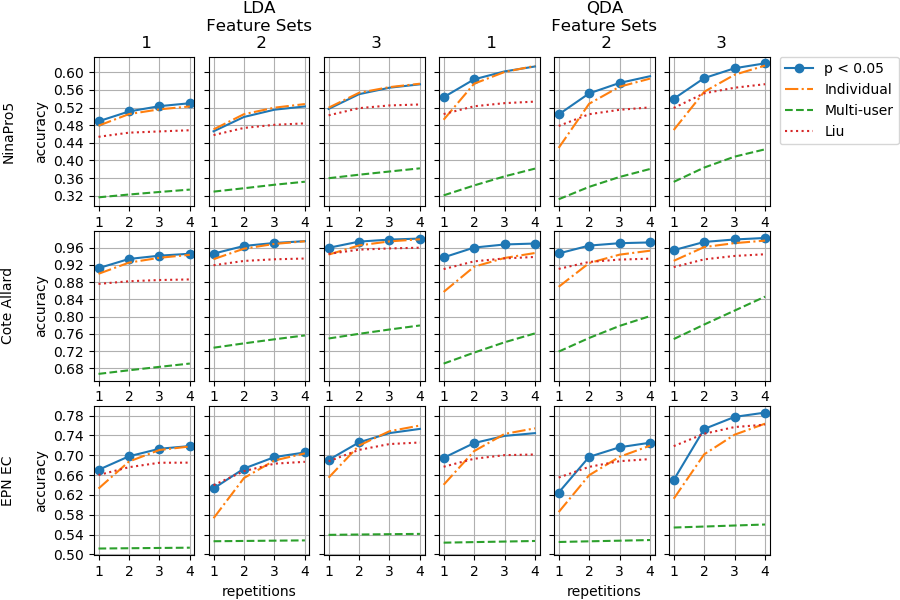

In [396]:
graphACC('Random')

<IPython.core.display.Javascript object>


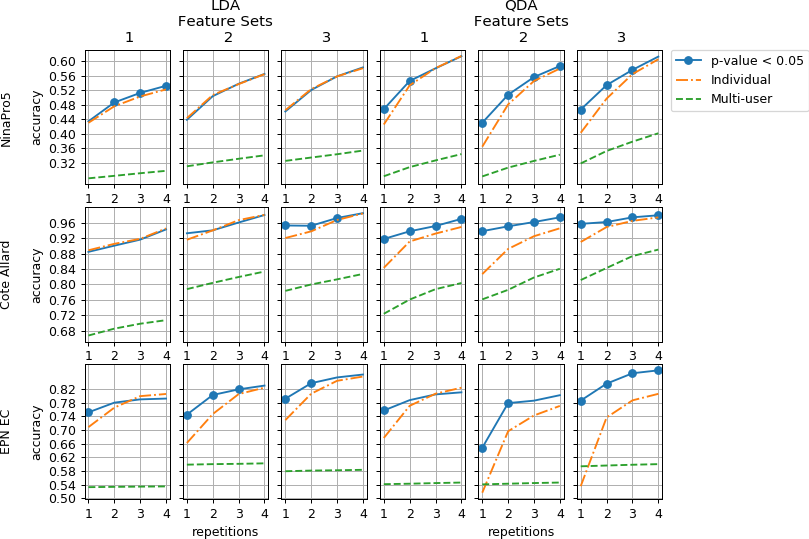

In [166]:
graphACC('Time')

<IPython.core.display.Javascript object>


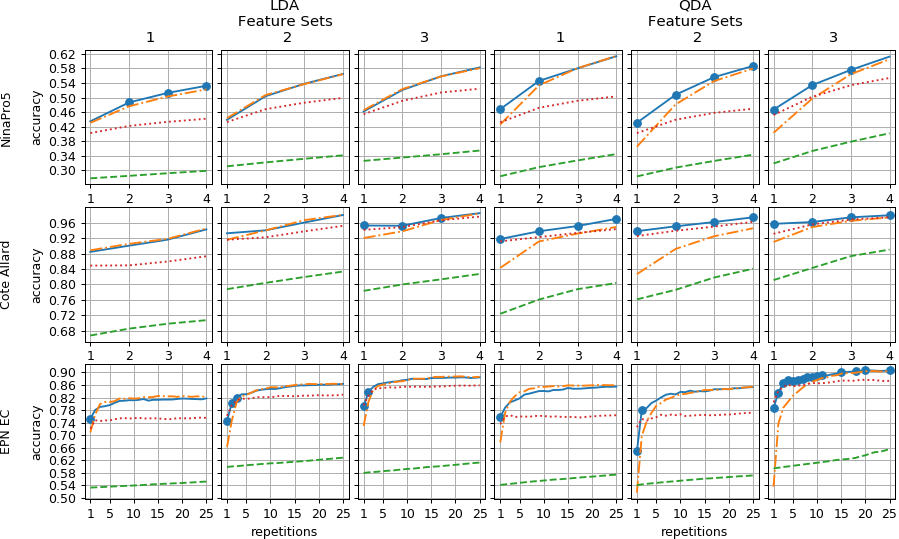

In [196]:
graphACC('Time')

<IPython.core.display.Javascript object>


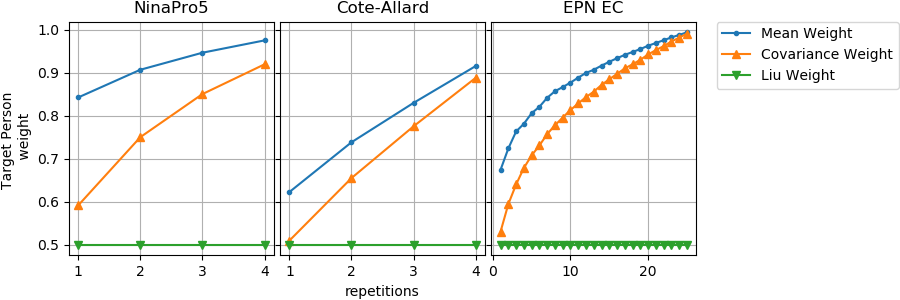

In [197]:
graphWeights()

In [437]:
np.arange(4)

array([0, 1, 2, 3])

<IPython.core.display.Javascript object>


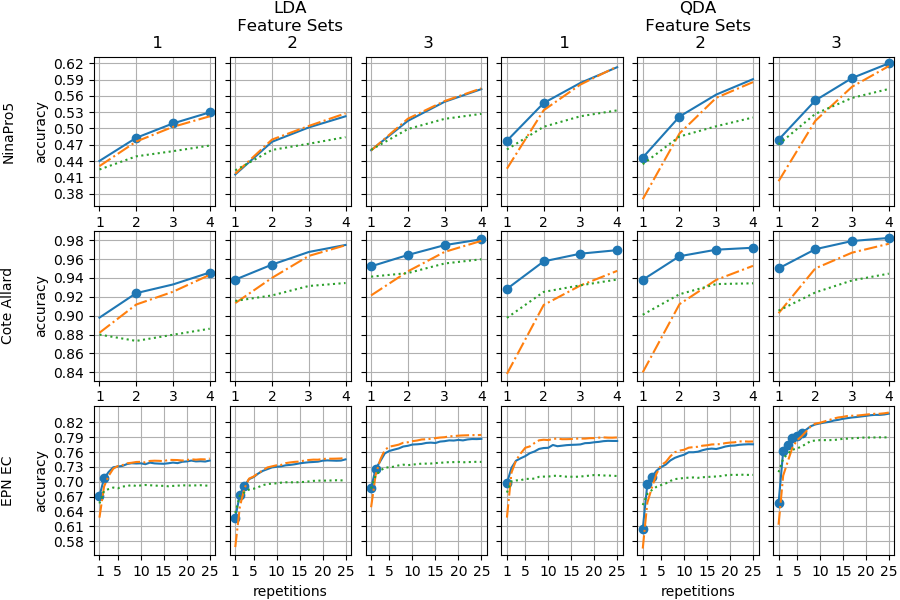

In [336]:
graphIndividualsNew('Time')

<IPython.core.display.Javascript object>


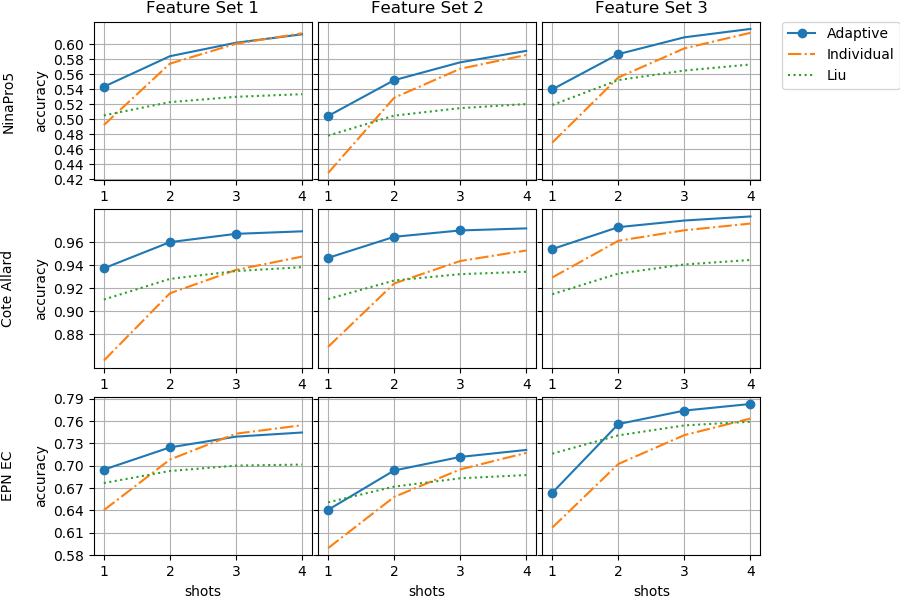

In [186]:
graphIndividualsNew('QDA','Random')

<IPython.core.display.Javascript object>


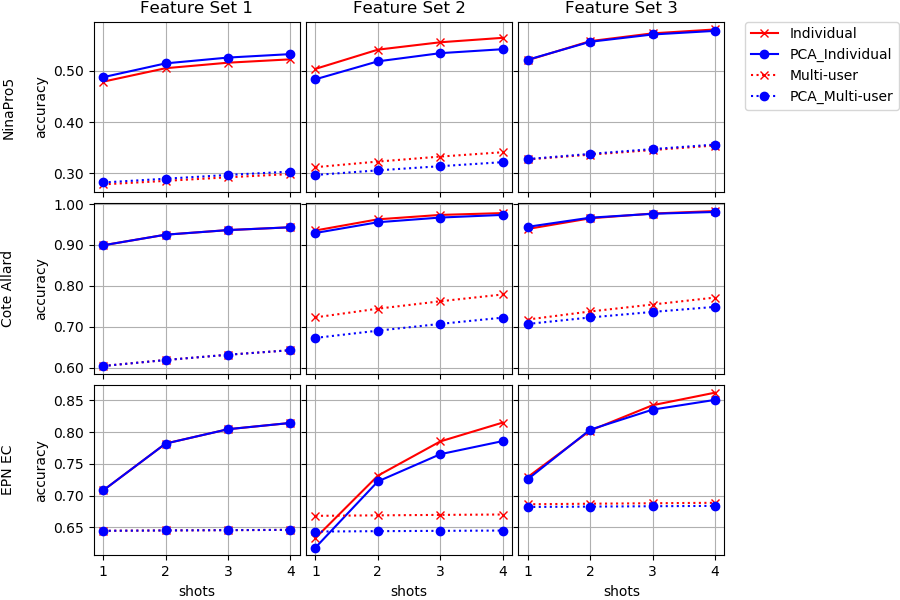

In [9]:
graphIndividuals('LDA')

<IPython.core.display.Javascript object>


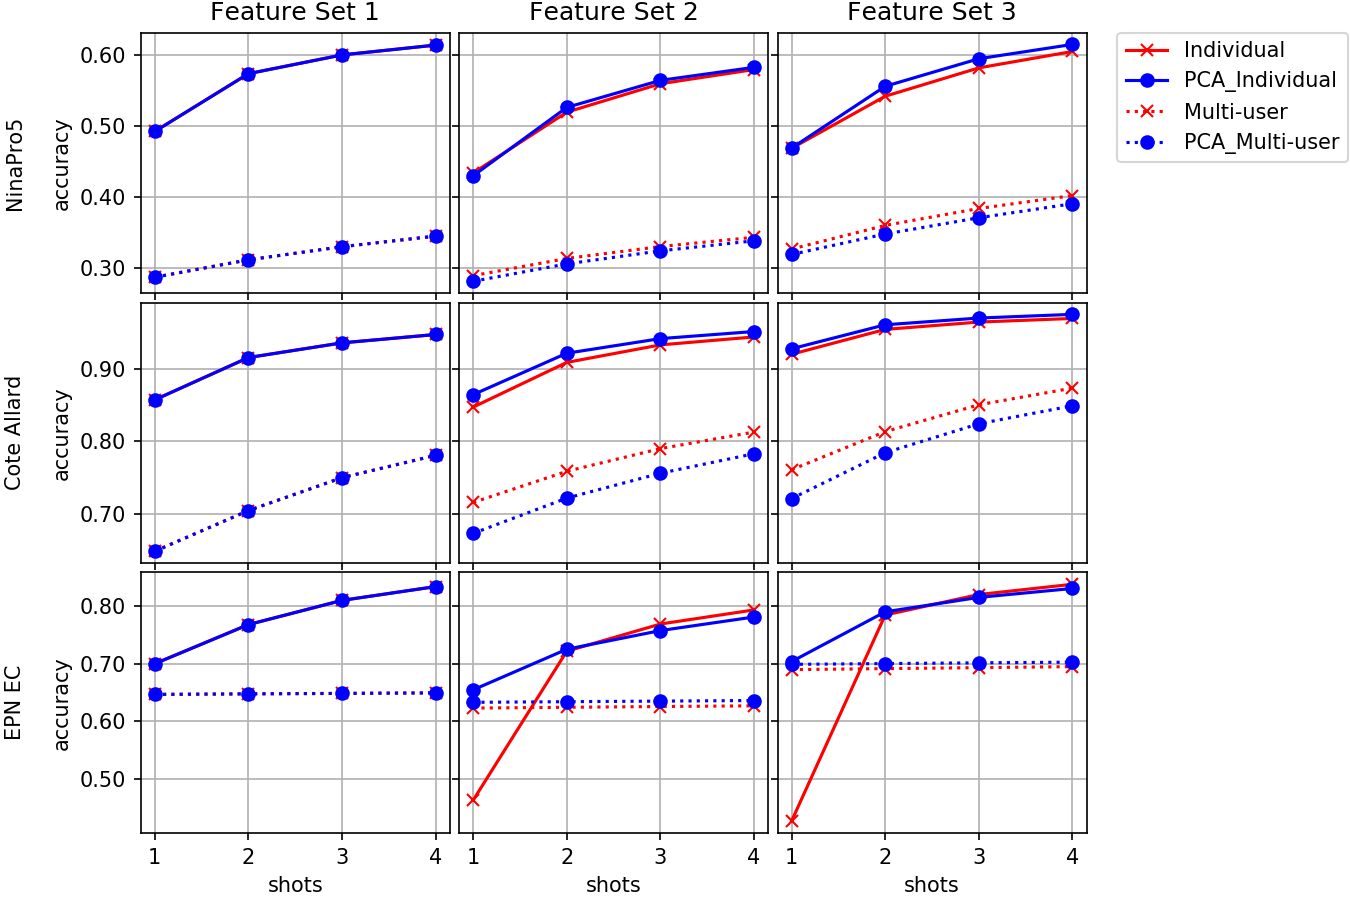

In [79]:
graphIndividuals('QDA')

# Analaysis of the three Databases

We compare the proposed model with the best baseline classifier. The best baseline for each classifier are trained with the following data:


1. LDA: with Few shots                          **(BL (Few)**
2. QDA: with Few shots using PCA                 **(BL (PCA_Few)**

<IPython.core.display.Javascript object>


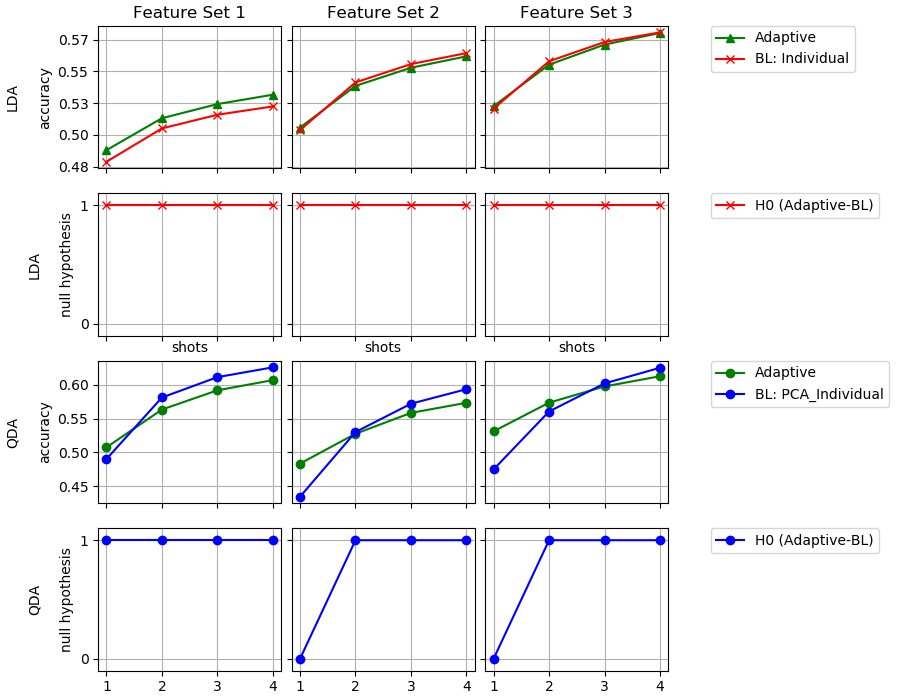

<IPython.core.display.Javascript object>


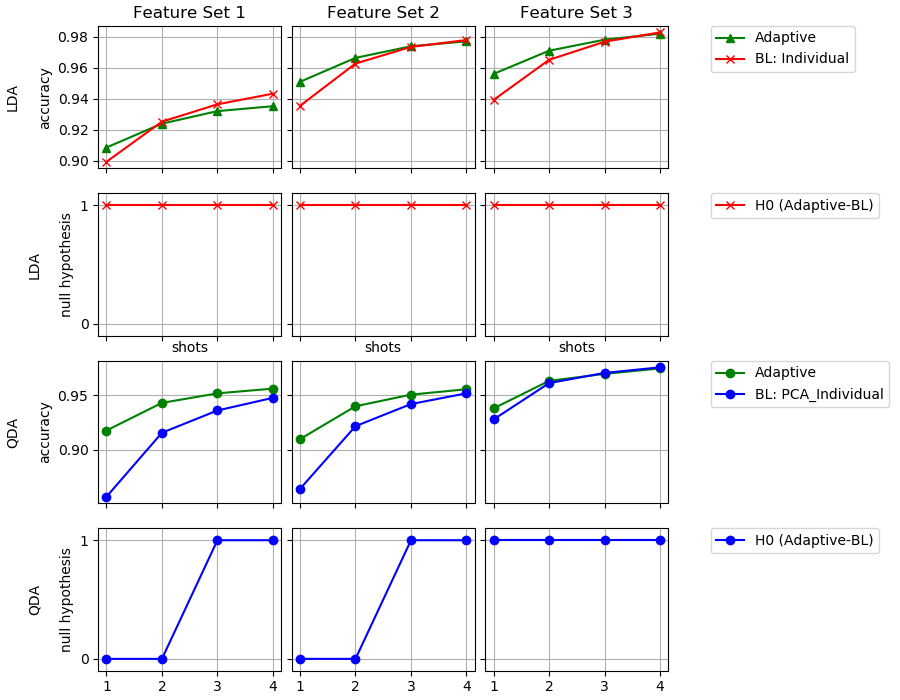

<IPython.core.display.Javascript object>


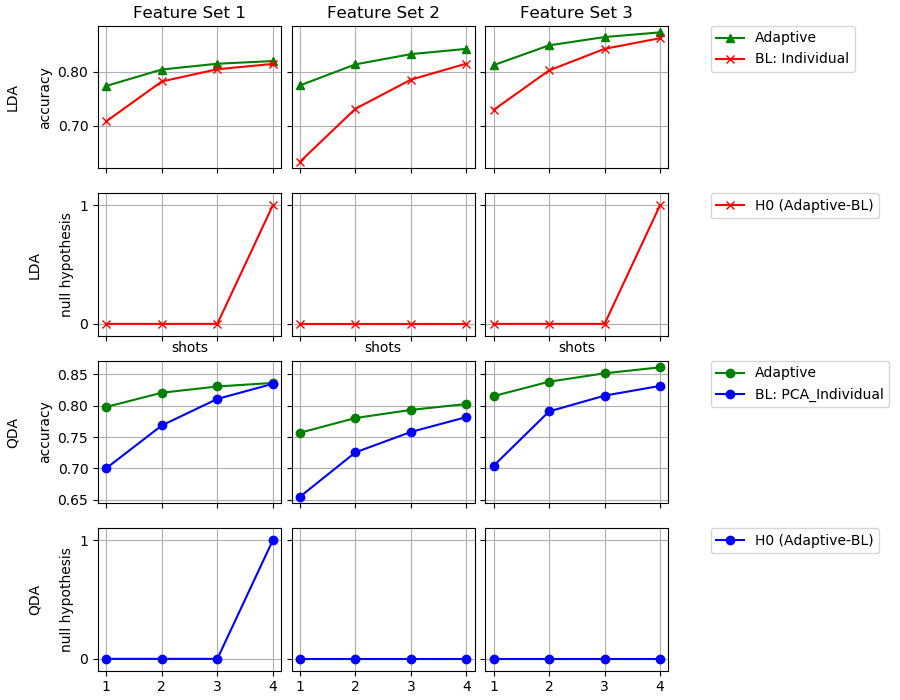

In [10]:
graphsDatabases()

<IPython.core.display.Javascript object>


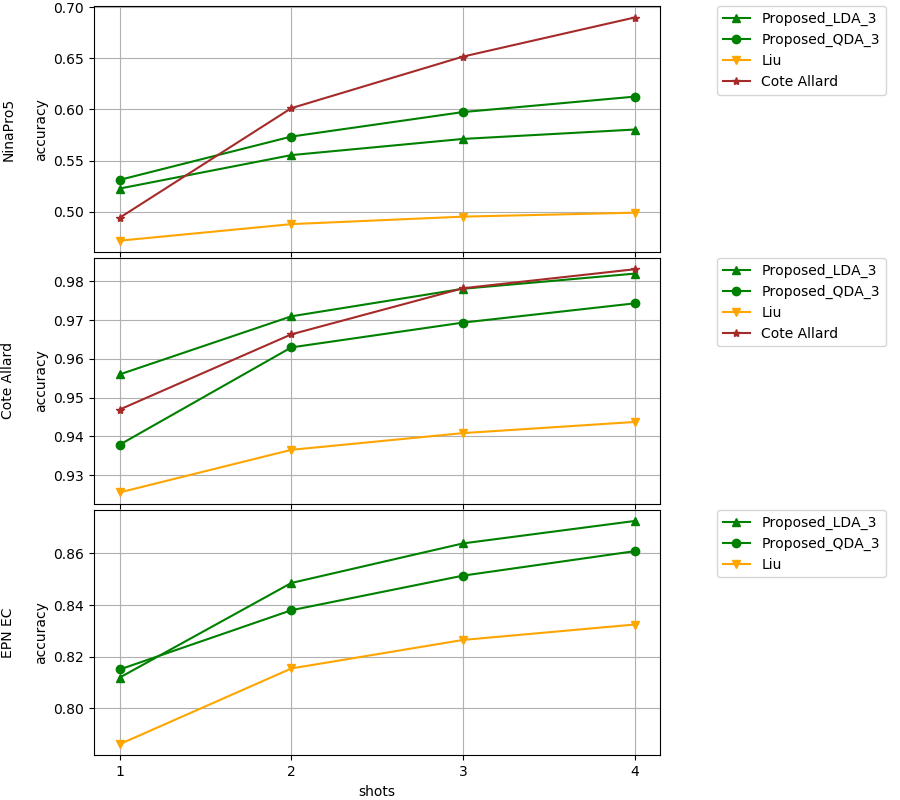

In [11]:
graphScientLiterat()

<IPython.core.display.Javascript object>


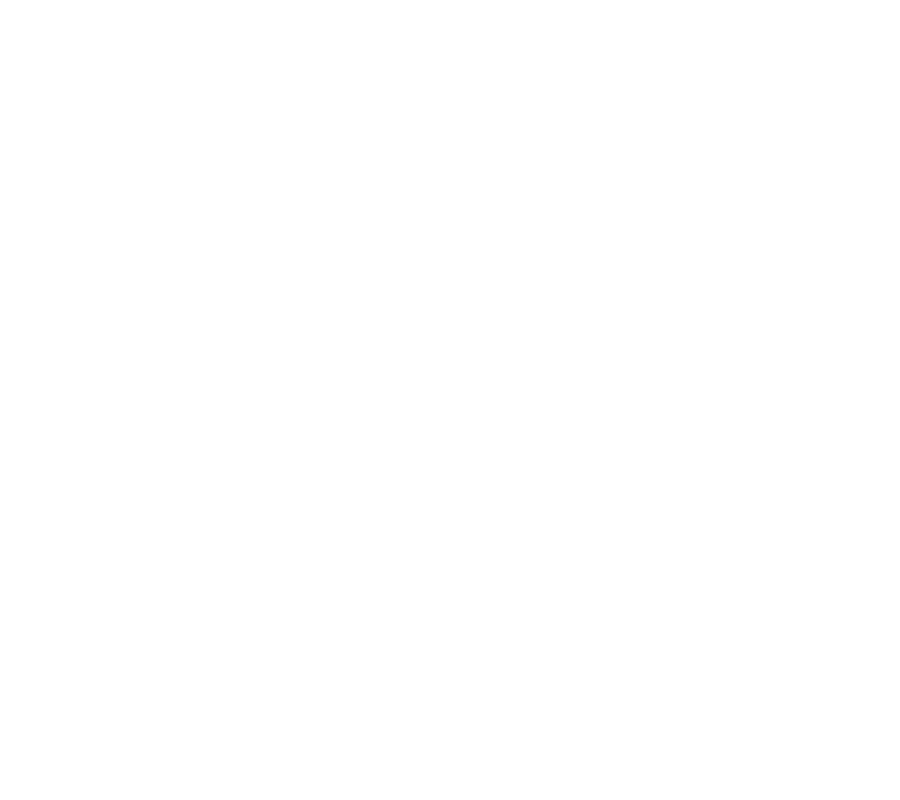

In [38]:
graphScientLiterat()

<IPython.core.display.Javascript object>


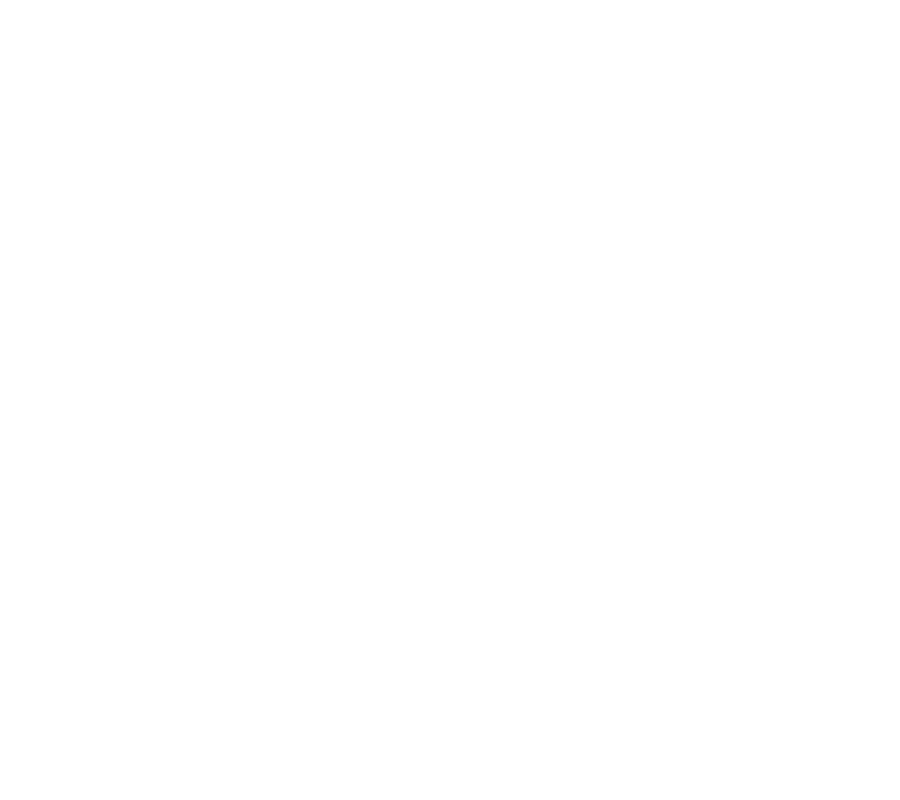

In [39]:
graphTime(timeNina5,timeCote,timeEPN)

In [40]:
graphsComparation()

NameError: name 'graphsComparation' is not defined

# Feature Set 1 (NinaPro 5):
1. Mean Absolute Value (MAV)

In [ ]:
graphsComparation(1)

# Feature Set 2:
1. Mean absolute value (MAV)
2. Waveform length (WL)
3. Zero Crossing (ZC)
4. Slope sign change (SSC)

In [ ]:
graphsComparation(2)

# Feature Set 3:
1. L-scale (LS)
2. Maximum fractal length (MFL)
3. Mean of the square root (MSR)
4. Willison amplitude (WAMP)

In [ ]:
graphsComparation(3)

In [ ]:
def graphIndivsPropo(FeatureSet,Classifier):
    shot=np.arange(1,5)
    
     #PROPOSED MODELS
    
    Model='Prop1'+Classifier
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        

    
    
    #INDIVIDUAL
    
    Model='IndPca'
    
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        
 
        
        
    
    plt.xlabel('shots')
    plt.ylabel('ACC')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('Best model (Feature: ' + str(FeatureSet) + ' Classifier: ' + Classifier + ')')
    plt.show()

    
def graph1_R(FeatureSet,Classifier):
    
    shot=np.arange(1,5)

        
    Model='rPropo1'+Classifier    
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']=='LDA'])
    plt.plot(shot,Y,label=Model +str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        

    plt.xlabel('shots')
    plt.ylabel('1-r')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('1-r (Feature Set: ' + str(FeatureSet) + ' Classifier: '+Classifier+')')
    plt.show()

for featureSet in range(1,4):
    graphIndivsPropo(featureSet,'LDA')
    graph1_R(featureSet,'LDA')
    graphIndivsPropo(featureSet,'QDA')
    graph1_R(featureSet,'QDA')
    

